In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings

pd.set_option('display.max_rows', None)

In [6]:
root_path = Path('/Users/jiahaozhan/Desktop/data and scripts/Sivers_data')
fname = 'P10101_OSA_Set2.csv'

data_dir = root_path / fname
df = pd.read_csv(data_dir)

print(df.columns)

Index(['Match Flag', 'Lot', 'Bar ID', 'Array ID', 'Chip ID', 'Device Type',
       'Wave', 'OSA1', 'OSA2', 'OSA3'],
      dtype='object')


/var/folders/ch/rfyq2j3x4fsf6nld0yfd9vkm0000gn/T/ipykernel_34129/2186691907.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir)


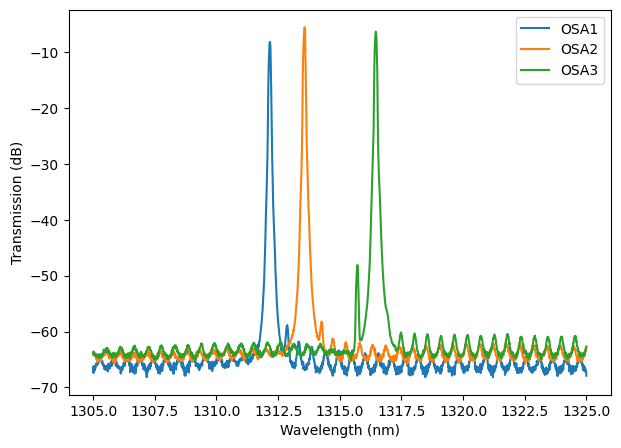

In [13]:
i = 3
id_l, id_u = (i-1)*2001, i*2001
dfb1 = df[id_l:id_u]
# plot spectrum
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dfb1['Wave'], dfb1['OSA1'], label=f'OSA{1}')
ax.plot(dfb1['Wave'], dfb1['OSA2'], label=f'OSA{2}')
ax.plot(dfb1['Wave'], dfb1['OSA3'], label=f'OSA{3}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()

In [30]:
bar_id, array_id, chip_id = set(), set(), set()
bar_array_id = set()

for id, row in df[0:].iterrows():
    b_id, a_id, c_id = row['Bar ID'], row['Array ID'], row['Chip ID']
    bar_id.add(b_id)
    array_id.add(a_id)
    chip_id.add(c_id)
    bar_array_id.add((b_id, a_id))

print(len(bar_id), bar_id)
print(len(array_id), array_id)
print(len(bar_array_id), bar_array_id)

18 {66, 67, 70, 71, 40, 41, 73, 43, 45, 46, 47, 80, 49, 81, 55, 57, 59, 63}
15 {2, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 22, 23}
20 {(49, 23), (63, 22), (45, 19), (59, 15), (47, 19), (41, 9), (57, 2), (66, 14), (46, 14), (81, 14), (45, 6), (55, 7), (73, 18), (45, 11), (67, 17), (70, 16), (80, 17), (43, 10), (40, 5), (71, 14)}


Text(0.5, 0.98, 'Bar ID, ArrY ID')

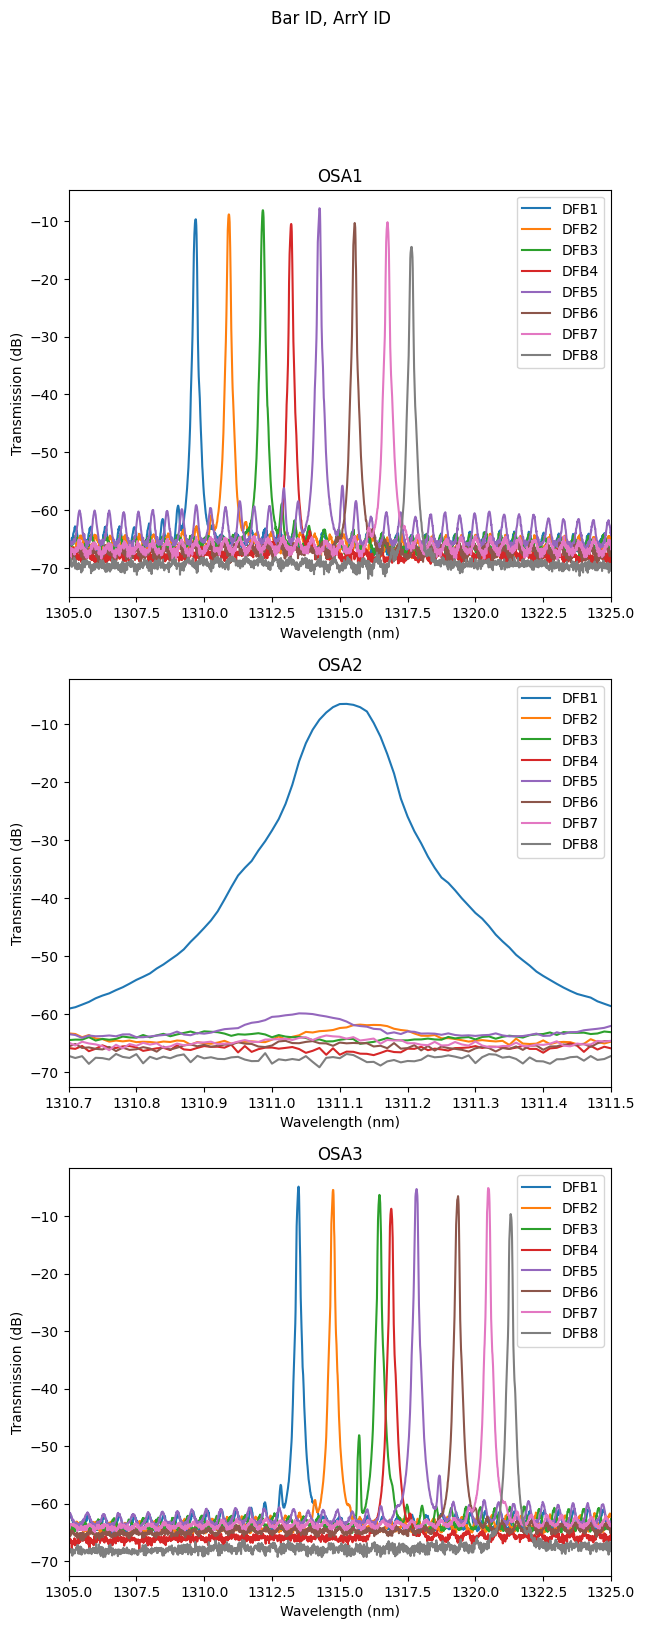

In [45]:
set_np = 0
dfb = {}
for i in range(0,8):
    id_l, id_u = i*2001, (i+1)*2001
    dfb[i] = df[id_l:id_u]
    
# plot spectrum
fig, axes = plt.subplots(3, 1, figsize=(7, 18))
ax = axes[0]
for i, ld in dfb.items():
    ax.plot(ld['Wave'], ld['OSA1'], label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_xlim([1305, 1325])
ax.set_title('OSA1')

ax = axes[1]
for i, ld in dfb.items():
    ax.plot(ld['Wave'], ld['OSA2'], label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_xlim([1310.7, 1311.5])
ax.set_title('OSA2')

ax = axes[2]
for i, ld in dfb.items():
    ax.plot(ld['Wave'], ld['OSA3'], label=f'DFB{i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_xlim([1305, 1325])
ax.set_title('OSA3')
fig.suptitle('Bar ID, ArrY ID')